<h1>Extracción de datos bursátiles utilizando una biblioteca de Python</h1>

Las acciones de una empresa son una parte de la empresa, más concretamente:
<p><b>Una acción (también conocida como capital social) es un título que representa la propiedad de una fracción de una sociedad anónima. Esto da derecho al propietario de la acción a una proporción de los activos y beneficios de la sociedad anónima equivalente a la cantidad de acciones que posee. Las unidades de acciones se denominan «acciones». [1]</p></b>
Un inversor puede comprar una acción y venderla más tarde. Si el precio de la acción sube, el inversor obtiene beneficios; si baja, el inversor sufre pérdidas.  Determinar el precio de una acción es complejo, ya que depende del número de acciones en circulación, del volumen de beneficios futuros de la empresa y de muchos otros factores. La gente negocia con acciones a lo largo del día. El teletipo bursátil es un informe sobre el precio de una determinada acción, que se actualiza continuamente durante la sesión bursátil por las distintas bolsas de valores.
<p>Eres un científico de datos que trabaja para un fondo de cobertura; tu trabajo consiste en detectar cualquier actividad bursátil sospechosa. En este laboratorio extraerás datos bursátiles utilizando una biblioteca de Python. Utilizaremos la biblioteca <coode>yfinance</code>, que nos permite extraer datos bursátiles y devolverlos en un marco de datos pandas. Utilizarás el laboratorio para extraerlos.</p>


In [7]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

In [8]:
import yfinance as yf
import pandas as pd

## Uso de la biblioteca yfinance para extraer datos bursátiles

Utilizando el módulo `Ticker` podemos crear un objeto que nos permitirá acceder a funciones para extraer datos. Para ello, debemos proporcionar el símbolo bursátil de la acción. En este caso, la empresa es Apple y el símbolo bursátil es `AAPL`.

In [9]:
apple = yf.Ticker("AAPL")

Ahora podemos acceder a funciones y variables para extraer el tipo de datos que necesitamos. Puedes verlos y lo que representan aquí https://aroussi.com/post/python-yahoo-finance.

In [10]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-08-06 21:22:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-08-06 21:22:53 (1.32 GB/s) - ‘apple.json’ saved [5699/5699]



### Información sobre acciones

Utilizando la información del atributo, podemos extraer información sobre las acciones como un diccionario de Python.

In [11]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

### Extracción del precio de las acciones

Una acción es la parte más pequeña de las acciones de una empresa que se puede comprar, y los precios de estas acciones fluctúan con el tiempo. Utilizando el método <code>history()</code> podemos obtener el precio de las acciones durante un determinado periodo de tiempo. Utilizando el parámetro `period` podemos establecer cuánto tiempo atrás desde el presente queremos obtener datos. Las opciones para `period` son 1 día (1d), 5d, 1 mes (1mo) , 3mo, 6mo, 1 año (1y), 2y, 5y, 10y, ytd y max.

In [16]:
apple_share_price_data = apple.history(period="max")

El formato en el que se devuelven los datos es un DataFrame de Pandas. Con la `Fecha` como índice, se proporcionan los valores `Apertura`, `Máximo`, `Mínimo`, `Cierre`, `Volumen` y `Divisiones de acciones` para cada día.

In [17]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0


Podemos restablecer el índice del DataFrame con la función reset_index. También establecemos el parámetro inplace en True para que el cambio se aplique al propio DataFrame.

In [17]:
apple_share_price_data.reset_index(inplace=True)

Podemos trazar el precio de apertura frente a la fecha:

<Axes: xlabel='Date'>

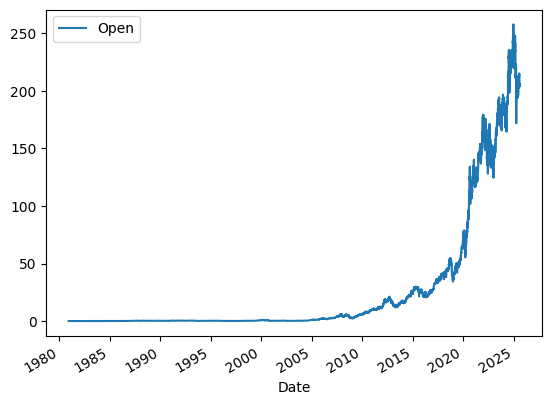

In [18]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracción de dividendos

Los dividendos son la distribución de los beneficios de una empresa entre los accionistas. En este caso, se definen como una cantidad de dinero devuelta por cada acción que posee un inversor. Utilizando los dividendos variables, podemos obtener un marco de datos con la información. El periodo de los datos viene dado por el periodo definido en la función «history».

In [19]:
apple.dividends

,Dividends
Date,
1987-05-11 00:00:00-04:00,0.000536
1987-08-10 00:00:00-04:00,0.000536
1987-11-17 00:00:00-05:00,0.000714
1988-02-12 00:00:00-05:00,0.000714
1988-05-16 00:00:00-04:00,0.000714
...,...
2024-05-10 00:00:00-04:00,0.250000
2024-08-12 00:00:00-04:00,0.250000
2024-11-08 00:00:00-05:00,0.250000


Podemos trazar los dividendos a lo largo del tiempo:

<Axes: xlabel='Date'>

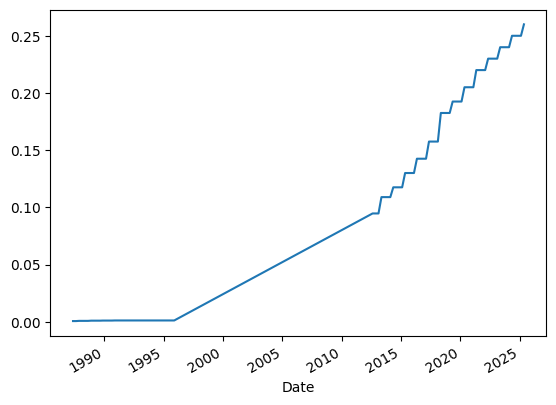

In [20]:
apple.dividends.plot()

## Exercise

Ahora, utilizando el módulo `Ticker`, crea un objeto para AMD (Advanced Micro Devices) con el símbolo bursátil `AMD`; asigna al objeto el nombre <code>amd</code>.

In [3]:
amd = yf.Ticker("AMD")

In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2025-08-06 21:15:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-08-06 21:15:26 (2.09 GB/s) - ‘amd.json’ saved [5838/5838]



In [5]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

Pregunta 1: Utiliza la clave «país» para encontrar el país al que pertenece la acción. Recuérdalo, ya que será una pregunta del cuestionario.

In [18]:
pais_de_amd = amd_info['country']

print(f"El país de la acción de AMD es: {pais_de_amd}")

El país de la acción de AMD es: United States


Pregunta 2: Utiliza la clave «sector» para encontrar el sector al que pertenece la acción. Recuérdalo, ya que será una pregunta del cuestionario.

In [19]:
sector_de_amd = amd_info['sector']

print(f"El sector de la acción de AMD es: {sector_de_amd}")

El sector de la acción de AMD es: Technology


Pregunta 3 Obtenga los datos bursátiles de AMD utilizando la función de historial y establezca el período en el máximo. Busque el volumen negociado el primer día (primera fila).

In [20]:
amd_share_price_data = amd.history(period="max")

In [21]:
amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,3.125000,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,3.125000,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,3.031250,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,3.041667,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,3.010417,3.020833,2.906250,2.916667,130800,0.0,0.0
